In [2]:
import pandas as pd
import numpy as np

# visualize
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Acquire Data

- I'm reading `eruptions.xlsx` in from an excel sheet.
- My initial `volcanoes` dataset has 659 rows and 36 columns.
- I'm reading `movies.csv` in from a csv file.
- My initial `movies` dataset has 74 rows and 8 columns.
- I'm reading `tfl_bus_safety.xlsx` in from an excel sheet.
- My initital `bus` dataset has 23158 row and 12 columns.

### Volcanoes

In [3]:
volcanoes = pd.read_excel('eruptions.xlsx')
volcanoes.shape

(659, 36)

In [4]:
volcanoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                658 non-null    float64
 1   Month                               552 non-null    float64
 2   Day                                 499 non-null    float64
 3   Associated Tsunami?                 133 non-null    object 
 4   Associated Earthquake?              55 non-null     object 
 5   Name                                658 non-null    object 
 6   Location                            658 non-null    object 
 7   Country                             658 non-null    object 
 8   Latitude                            658 non-null    float64
 9   Longitude                           658 non-null    float64
 10  Elevation                           658 non-null    float64
 11  Type                                658 non-n

### Movies

In [5]:
movies = pd.read_csv('movies.csv')
movies.shape

(74, 8)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               74 non-null     object 
 1   Genre              74 non-null     object 
 2   Lead Studio        73 non-null     object 
 3   Audience  score %  73 non-null     float64
 4   Profitability      71 non-null     float64
 5   Rotten Tomatoes %  73 non-null     float64
 6   Worldwide Gross    74 non-null     float64
 7   Year               74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [7]:
movies.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


### Bus

In [8]:
bus = pd.read_excel('tfl_bus_safety.xlsx')
bus.shape

(23158, 12)

In [9]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       23158 non-null  int64         
 1   Date Of Incident           23158 non-null  datetime64[ns]
 2   Route                      23158 non-null  object        
 3   Operator                   23158 non-null  object        
 4   Group Name                 23158 non-null  object        
 5   Bus Garage                 23158 non-null  object        
 6   Borough                    23158 non-null  object        
 7   Injury Result Description  23158 non-null  object        
 8   Incident Event Type        23158 non-null  object        
 9   Victim Category            23158 non-null  object        
 10  Victims Sex                23158 non-null  object        
 11  Victims Age                23158 non-null  object        
dtypes: d

In [10]:
bus.head()

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly


___

## Prepare Volcanoes Data

- I'm going to start with only columns that have 658 non-null values to make my dataset manageable for a MVP.
- I will rename my columns to be lowercase.
- Drop the first row due to missing values. This will leave my dataset at 658 rows and 9 columns.

In [11]:
volcanoes = volcanoes[['Year', 'Name', 'Location', 'Country', 'Latitude', 'Longitude', 'Elevation', 'Type', 'Status']]

In [12]:
volcanoes.columns = ['year', 'name', 'location', 'country', 'latitude', 'longitude',
       'elevation', 'type', 'status']

In [13]:
volcanoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       658 non-null    float64
 1   name       658 non-null    object 
 2   location   658 non-null    object 
 3   country    658 non-null    object 
 4   latitude   658 non-null    float64
 5   longitude  658 non-null    float64
 6   elevation  658 non-null    float64
 7   type       658 non-null    object 
 8   status     658 non-null    object 
dtypes: float64(4), object(5)
memory usage: 46.5+ KB


In [14]:
volcanoes.head()

,year,name,location,country,latitude,longitude,elevation,type,status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4360.0,Macauley Island,Kermadec Is,New Zealand,-30.200,-178.470,238.0,Caldera,Holocene
2,-4350.0,Kikai,Ryukyu Is,Japan,30.780,130.280,717.0,Caldera,Historical
3,-4050.0,Masaya,Nicaragua,Nicaragua,11.984,-86.161,635.0,Caldera,Historical
4,-4000.0,Pago,New Britain-SW Pac,Papua New Guinea,-5.580,150.520,742.0,Caldera,Historical


In [15]:
# drop the first row because of Null values, no year.

volcanoes = volcanoes[~volcanoes.year.isna()]
volcanoes.head()

,year,name,location,country,latitude,longitude,elevation,type,status
1,-4360.0,Macauley Island,Kermadec Is,New Zealand,-30.200,-178.470,238.0,Caldera,Holocene
2,-4350.0,Kikai,Ryukyu Is,Japan,30.780,130.280,717.0,Caldera,Historical
3,-4050.0,Masaya,Nicaragua,Nicaragua,11.984,-86.161,635.0,Caldera,Historical
4,-4000.0,Pago,New Britain-SW Pac,Papua New Guinea,-5.580,150.520,742.0,Caldera,Historical
5,-3580.0,Taal,Luzon-Philippines,Philippines,14.002,120.993,400.0,Stratovolcano,Historical


In [16]:
for col in volcanoes.columns:
    if volcanoes[col].dtype == 'object':
        print(volcanoes[col].value_counts(dropna=False).head(30))
        print('-------------------')

Etna                      19
Mayon                     17
Merapi                    17
Kelut                     16
Semeru                    16
Asama                     16
Vesuvius                  15
Hekla                     15
Katla                     15
Sakura-jima               14
Kilauea                   12
Gamalama                   9
Aso                        9
Fuego                      9
Karangetang [Api Siau]     8
Dieng Volc Complex         8
Stromboli                  8
Kirishima                  8
Tungurahua                 8
Taal                       7
Krakatau                   7
Santorini                  7
Paluweh                    7
Bardarbunga                6
Grimsvotn                  6
Banda Api                  6
Awu                        6
Soufriere Hills            6
Myojun Knoll               6
Raung                      5
Name: name, dtype: int64
-------------------
Java                    76
Italy                   44
Kyushu-Japan            35
Luzo

In [17]:
volcanoes.describe().T

,count,mean,std,min,25%,50%,75%,max
year,658.0,1671.405775,786.005793,-4360.00,1730.000,1895.000,1967.00000,2014.00
latitude,658.0,16.306745,26.102522,-62.97,-6.102,13.736,36.40400,65.73
longitude,658.0,49.928179,100.351199,-178.47,-19.700,110.442,129.96775,177.18
elevation,658.0,1936.869301,1244.770279,-642.00,1053.000,1695.000,2565.00000,5967.00


___

## Prepare Movies Data

- Rename columns to be all lowercase.
- I'm going to drop any rows with NULL values for this mvp. This leaves me with 69 rows and 8 columns.


In [18]:
movies.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
1,(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
2,A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
3,A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
4,Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


In [19]:
movies.columns = ['film', 'genre', 'lead_studio', 'audience_score_pcnt', 'profitability',
       'rotten_tomatoes_pcnt', 'worldwide_gross', 'year']

In [20]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   film                  74 non-null     object 
 1   genre                 74 non-null     object 
 2   lead_studio           73 non-null     object 
 3   audience_score_pcnt   73 non-null     float64
 4   profitability         71 non-null     float64
 5   rotten_tomatoes_pcnt  73 non-null     float64
 6   worldwide_gross       74 non-null     float64
 7   year                  74 non-null     int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 4.8+ KB


In [21]:
movies = movies.dropna()
movies.shape

(69, 8)

In [22]:
for col in movies.columns:
    if movies[col].dtype == 'object':
        print(f'The {col} column has {movies[col].nunique()} unique values')
        print('')
        print(movies[col].value_counts(dropna=False).head(30))
        print('-------------------')

The film column has 69 unique values

Leap Year                             1
Marley and Me                         1
Music and Lyrics                      1
The Heartbreak Kid                    1
Not Easily Broken                     1
You Will Meet a Tall Dark Stranger    1
Good Luck Chuck                       1
Nick and Norah's Infinite Playlist    1
27 Dresses                            1
The Duchess                           1
License to Wed                        1
Made of Honor                         1
The Twilight Saga: New Moon           1
Valentine's Day                       1
A Serious Man                         1
The Back-up Plan                      1
Love & Other Drugs                    1
Gnomeo and Juliet                     1
Rachel Getting Married                1
Waitress                              1
Midnight in Paris                     1
The Time Traveler's Wife              1
Water For Elephants                   1
Fireproof                             1
Li

In [23]:
# I see a big difference in the mean and median values of profitability, so I'll go with median.

movies_stats = movies.describe().T
movies_stats[['count', 'mean', '50%']]

,count,mean,50%
audience_score_pcnt,69.0,64.463768,65.000000
profitability,69.0,4.806197,2.642353
rotten_tomatoes_pcnt,69.0,47.884058,46.000000
worldwide_gross,69.0,142.647904,79.180000
year,69.0,2009.000000,2009.000000


___

## Prepare Bus Dataset

- Rename columns to all be lowercase.
- Encode `victims_age`?
- 8752 `Garage Not Available`, so I will drop this column
- The most common route in the dataset is `OOS` or Out Of Service.
- The `group_name` column is so imbalanced that I will either use only a subset of groups from the dataset or drop this column. One of the groups only has 1 observation, so I can't even stratify the values in that column reasonably in a train, validate, test split.
- 

In [24]:
bus.columns = ['year', 'incident_date', 'route', 'operator', 'group_name',
       'bus_garage', 'borough', 'injury_result_description',
       'incident_event_type', 'victim_category', 'victims_sex', 'victims_age']

In [25]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   year                       23158 non-null  int64         
 1   incident_date              23158 non-null  datetime64[ns]
 2   route                      23158 non-null  object        
 3   operator                   23158 non-null  object        
 4   group_name                 23158 non-null  object        
 5   bus_garage                 23158 non-null  object        
 6   borough                    23158 non-null  object        
 7   injury_result_description  23158 non-null  object        
 8   incident_event_type        23158 non-null  object        
 9   victim_category            23158 non-null  object        
 10  victims_sex                23158 non-null  object        
 11  victims_age                23158 non-null  object        
dtypes: d

In [26]:
for col in bus.columns:
    if bus[col].dtype == 'object':
        print(f'The {col} column has {bus[col].nunique()} unique values')
        print('')
        print('This is the top 30 or less most frequent values:')
        print(bus[col].value_counts(dropna=False).head(30))
        print('-------------------')

The route column has 612 unique values

This is the top 30 or less most frequent values:
OOS    321
18     191
55     177
24     165
73     156
96     155
149    154
207    153
25     143
65     136
137    136
12     136
390    135
38     133
142    132
253    131
281    130
53     130
254    126
29     124
205    123
177    121
86     121
144    120
60     120
197    120
453    118
88     117
220    117
174    115
Name: route, dtype: int64
-------------------
The operator column has 25 unique values

This is the top 30 or less most frequent values:
Metroline                3457
Arriva London North      3208
East London              2402
London United            2263
Selkent                  1808
Arriva London South      1743
London General           1723
London Central           1367
Metroline West           1232
Abellio London            963
Metrobus                  786
Tower Transit             738
Arriva The Shires         305
Blue Triangle Buses       281
London Sovereign        

In [27]:
bus_stats = bus.describe().T
bus_stats[['count', 'min', 'max']]

,count,min,max
year,23158.0,2015.0,2018.0


### Bus Prepare Takeaways

- There are 612 different routes in the dataset.
- 25 different operators.
- 14 group names
- 84 garages
- 35 boroughs
- 4 injury results
- 10 event types
- 17 victim categories
- 2 victim sex categories with 3602 observations `Unknown`
- 5 victim age categories
- The year range is from 2015-2018.

___

## Explore Data

- I will split my data before I begin bi- and multi-variate exploration.
- I'm not sure what my target will be yet, so I'm not going to stratify on a variable yet.

In [28]:
def bus_split(df):
    '''
    This function take in the tfl_bus_safety dataset acquired from a csv file,
    performs a split and stratifies target column.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test

In [29]:
train, validate, test = bus_split(bus)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (12968, 12)
validate -> (5558, 12)
test -> (4632, 12)


In [30]:
train.head(2)

,year,incident_date,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
9282,2016,2016-07-01,7,Metroline,Metroline,West Perivale,Westminster,Reported Minor Injury - Treated at Hospital,Collision Incident,Bus Driver,Male,Adult
14204,2017,2017-05-01,262,East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Slip Trip Fall,Passenger,Unknown,Unknown


##### Narrow Down Incident Event Types to the Top Five

- Slip Trip Fall             3905
- Onboard Injuries           3744
- Personal Injury            2571
- Collision Incident         2278
- Assault                     315

In [31]:
train.groupby('incident_event_type').incident_date.count().sort_values(ascending=False)

incident_event_type
Slip Trip Fall             3905
Onboard Injuries           3744
Personal Injury            2571
Collision Incident         2278
Assault                     315
Activity Incident Event      67
Safety Critical Failure      43
Vandalism Hooliganism        39
Fire                          4
Robbery                       2
Name: incident_date, dtype: int64

##### Where are most collisions occuring?

In [32]:
collision_incidents = train[train.incident_event_type == 'Collision Incident']
collision_incidents.head()

,year,incident_date,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
9282,2016,2016-07-01,7,Metroline,Metroline,West Perivale,Westminster,Reported Minor Injury - Treated at Hospital,Collision Incident,Bus Driver,Male,Adult
9690,2016,2016-07-01,363,Metrobus,Go-Ahead,Peckham,Southwark,Injuries treated on scene,Collision Incident,Pedestrian,Male,Adult
19871,2018,2018-03-01,405,Metrobus,Go-Ahead,Croydon (Metrobus),Croydon,Reported Minor Injury - Treated at Hospital,Collision Incident,Pedestrian,Female,Elderly
430,2015,2015-04-01,19,London General,Go-Ahead,Garage Not Available,Westminster,Taken to Hospital – Reported Serious Injury or...,Collision Incident,Pedestrian,Male,Adult
15035,2017,2017-07-01,62,East London,Stagecoach,Barking (East London Buses),Barking & Dagenham,Reported Minor Injury - Treated at Hospital,Collision Incident,Passenger,Female,Unknown


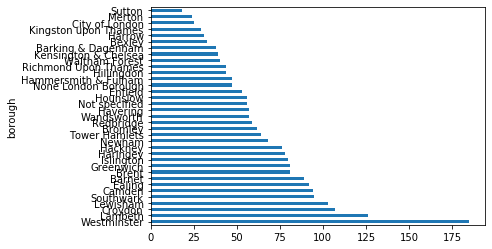

In [33]:
collision_incidents.groupby('borough').incident_date.count().sort_values(ascending=False).plot(kind='barh')
plt.show()

##### Is the incident type independent of the borough?



#### Chi-square Test

Is the type of `incident_event_type` independent of the `borough` where it occurs?

$H_0$: The `incident_event_type` is independent of the `borough` of occurance.

$H_a$: The `indicent_event_type` is not independent of the `borough` of occurance.

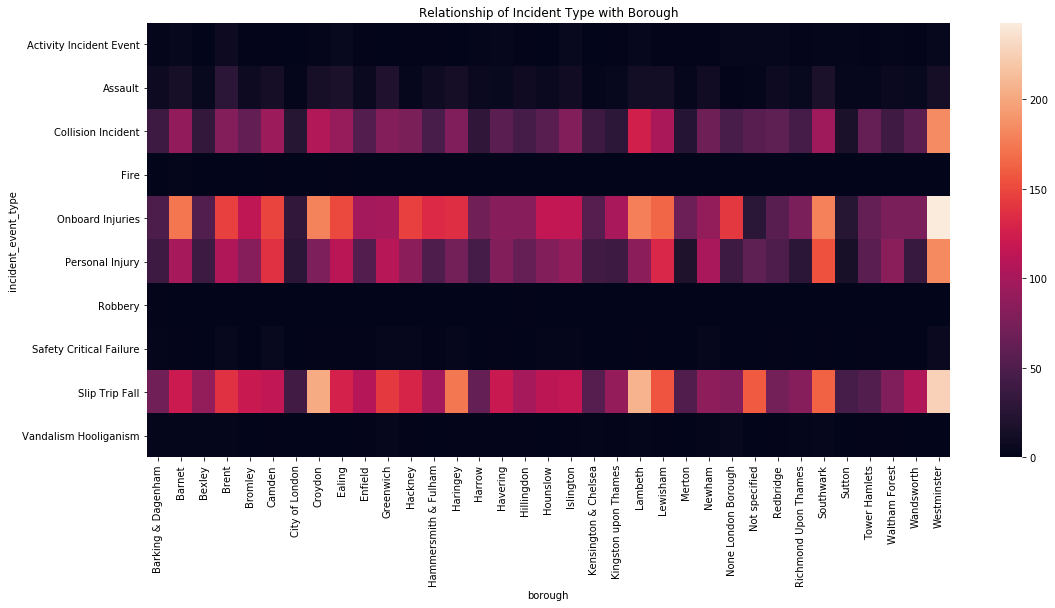

In [41]:
# Calculate p-value using the test statistic.

from scipy import stats
plt.figure(figsize=(18, 8))

observed = pd.crosstab(train.incident_event_type, train.borough)
sns.heatmap(observed)
plt.title('Relationship of Incident Type with Borough')
plt.show()

In [92]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'Chi-square: {chi2}\nP-value: {p}')

Chi-square: 722.9954356372685
P-value: 8.980816429765829e-36


##### Test Results

With a low p-value, I reject my Null hypothesis that incident_event_type is independent of borough.

##### Narrow Down Borough to the Top Ten

- Westminster    852
- Southwark      610
- Lambeth        608
- Croydon        582
- Lewisham       567
- Camden         510
- Ealing         500
- Brent          499
- Barnet         498
- Haringey       474

In [31]:
train.groupby('borough').incident_event_type.count().sort_values(ascending=False)

borough
Westminster             862
Southwark               616
Lambeth                 615
Croydon                 585
Lewisham                569
Camden                  518
Brent                   513
Barnet                  507
Ealing                  507
Haringey                478
Greenwich               460
Hackney                 445
Islington               421
Bromley                 387
Hounslow                373
Newham                  363
Havering                350
Hammersmith & Fulham    340
Enfield                 324
None London Borough     317
Not specified           306
Hillingdon              304
Waltham Forest          287
Wandsworth              279
Kingston upon Thames    265
Redbridge               250
Tower Hamlets           242
Richmond Upon Thames    237
Bexley                  221
Harrow                  219
Barking & Dagenham      210
Kensington & Chelsea    195
Merton                  165
City of London          129
Sutton                  109
Name: incide

In [32]:
train.groupby('borough').incident_event_type.count().sort_values(ascending=False).head(10).index

Index(['Westminster', 'Southwark', 'Lambeth', 'Croydon', 'Lewisham', 'Camden',
       'Brent', 'Barnet', 'Ealing', 'Haringey'],
      dtype='object', name='borough')

In [33]:
borough_cols = ['Westminster', 'Southwark', 'Lambeth', 'Croydon', 'Lewisham', 'Camden',
       'Ealing', 'Brent', 'Barnet', 'Haringey']

In [34]:
train = train[train['borough'].isin(borough_cols)]
train.shape

(5770, 12)

In [35]:
# Create subset of Top 5 Injury Event types.

event_cols = ['Slip Trip Fall', 'Onboard Injuries', 'Personal Injury', 'Collision Incident', 'Assault']
train = train[train['incident_event_type'].isin(event_cols)]
train.shape

(5700, 12)

##### Where are Types of Incidents Happening?

In [36]:
train.groupby(['incident_event_type', 'borough']).incident_date.count().sort_values(ascending=False)

incident_event_type  borough    
Onboard Injuries     Westminster    243
Slip Trip Fall       Westminster    226
                     Lambeth        207
                     Croydon        203
Collision Incident   Westminster    185
Personal Injury      Westminster    184
Onboard Injuries     Croydon        180
                     Southwark      179
                     Lambeth        178
Slip Trip Fall       Haringey       174
Onboard Injuries     Barnet         173
                     Lewisham       165
Slip Trip Fall       Southwark      163
                     Lewisham       156
Personal Injury      Southwark      155
Onboard Injuries     Ealing         150
                     Camden         149
                     Brent          147
Slip Trip Fall       Brent          138
Personal Injury      Camden         138
Onboard Injuries     Haringey       136
Personal Injury      Lewisham       131
Slip Trip Fall       Ealing         128
Collision Incident   Lambeth        126
Slip Tr

##### Should I Focus on Assault as an Incident Event Type Overall?

In [37]:
assault_group = train[train.incident_event_type == 'Assault'].groupby('borough').incident_event_type.count().sort_values(ascending=False)
assault_group

borough
Brent          28
Ealing         18
Southwark      18
Barnet         15
Croydon        15
Camden         14
Haringey       14
Westminster    14
Lambeth        12
Lewisham       12
Name: incident_event_type, dtype: int64

In [40]:
print(train.shape)
train.head()

(5700, 12)


,year,incident_date,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
9282,2016,2016-07-01,7,Metroline,Metroline,West Perivale,Westminster,Reported Minor Injury - Treated at Hospital,Collision Incident,Bus Driver,Male,Adult
4486,2015,2015-10-01,205,East London,Stagecoach,Garage Not Available,Westminster,Injuries treated on scene,Onboard Injuries,Passenger,Male,Adult
14038,2017,2017-05-01,109,Abellio London,Abellio,Beddington (Abellio London),Lambeth,Injuries treated on scene,Slip Trip Fall,Passenger,Female,Adult
4812,2015,2015-11-01,68,London Central,Go-Ahead,Garage Not Available,Lambeth,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
9690,2016,2016-07-01,363,Metrobus,Go-Ahead,Peckham,Southwark,Injuries treated on scene,Collision Incident,Pedestrian,Male,Adult
